In [1]:
from SPV_utils import *
v0s = ["0.10", "0.15", "0.20", "0.25", "0.30", "0.35", "0.40", "0.45"]


batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


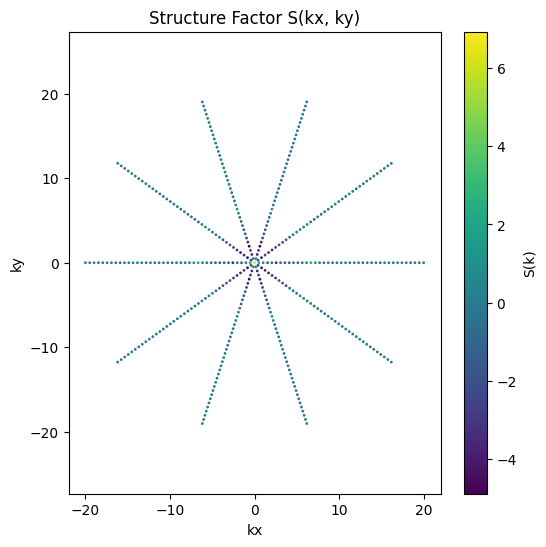

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


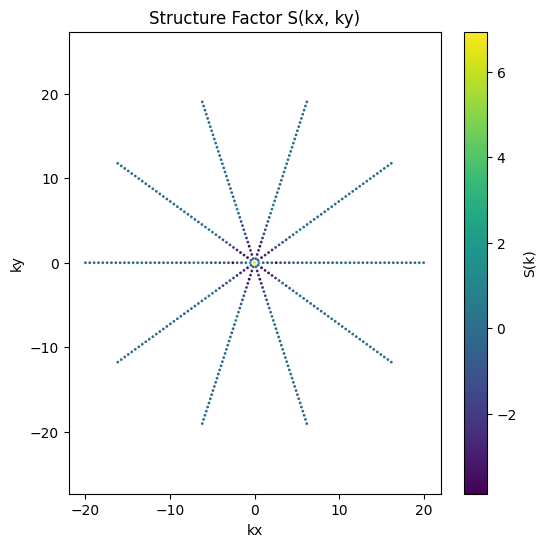

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


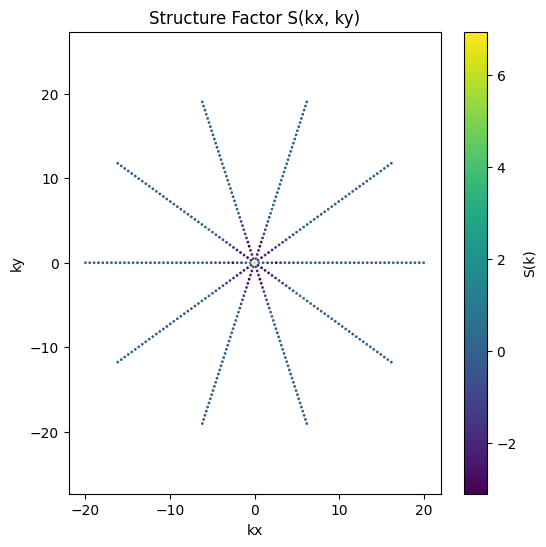

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


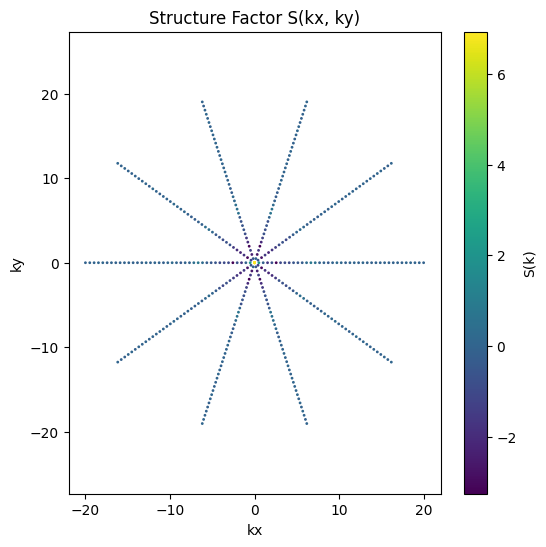

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


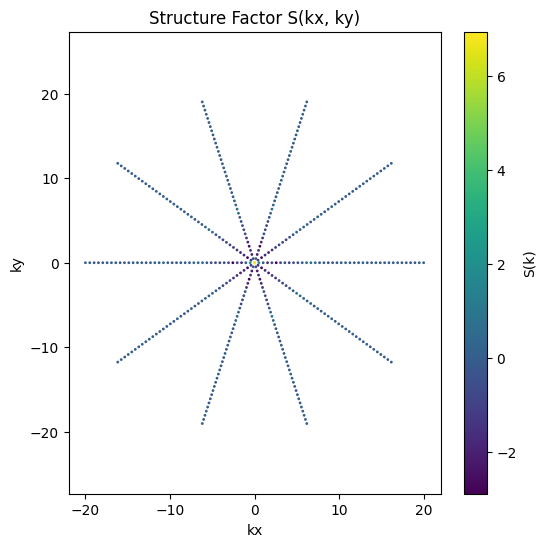

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


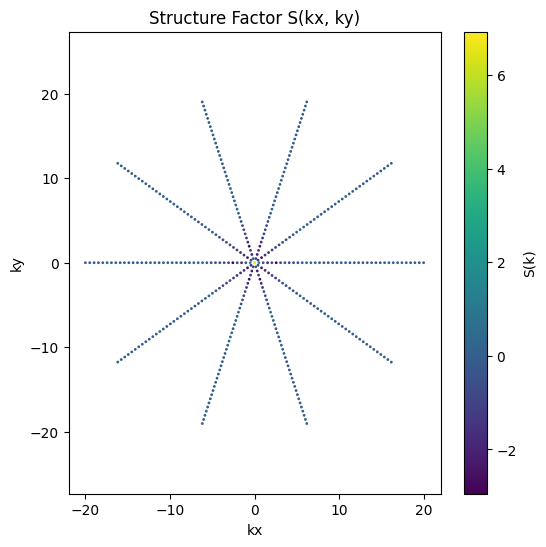

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


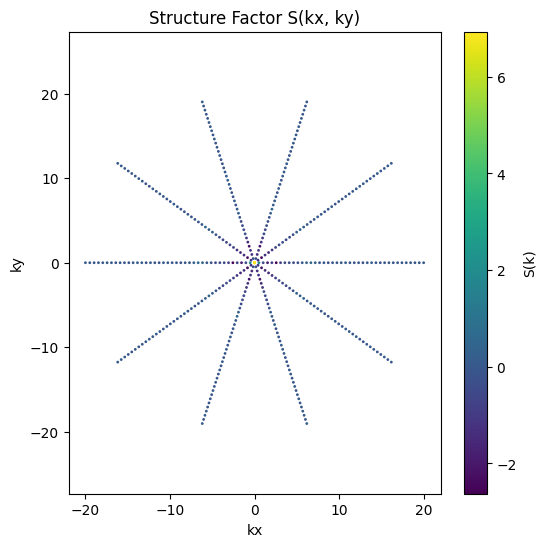

batch 0.0 of 4.0
batch 1.0 of 4.0
batch 2.0 of 4.0
batch 3.0 of 4.0


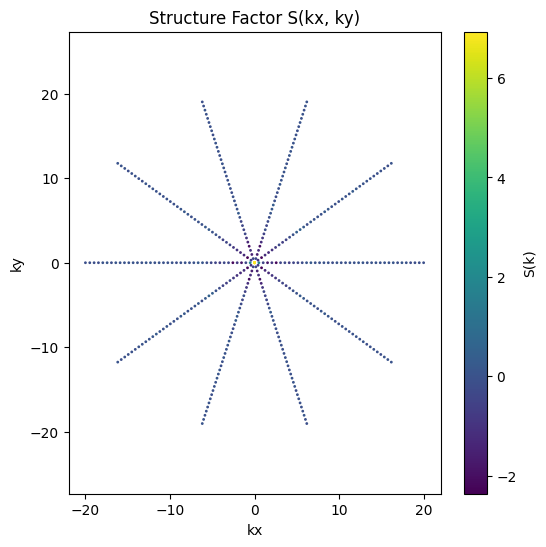

In [2]:
S_2d_all = {}
for v0 in v0s:
    results = {}
    
    for i in range(1,2): #11):
        folder = rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_{i}.npy"
        timestamps, arrays = get_data_from_npy(folder)
        
        
        k_vectors, context = get_polar_k_grid(n_k = 40, n_theta = 10, k_max = 20)
        S_flat = Sf_iso(k_vectors, arrays, batch_size = 100)
        
        results[i] = S_flat
        
        
        
    S_2d_ensemble = display_polar_k_grid(results[1].mean(axis = 0), context)
    # for i in range(2,11):
    #     S_2d_ensemble += display_polar_k_grid(results[i].mean(axis = 0), context)
    # S_2d_ensemble/=10
    
    S_2d_all[v0] = S_2d_ensemble
    


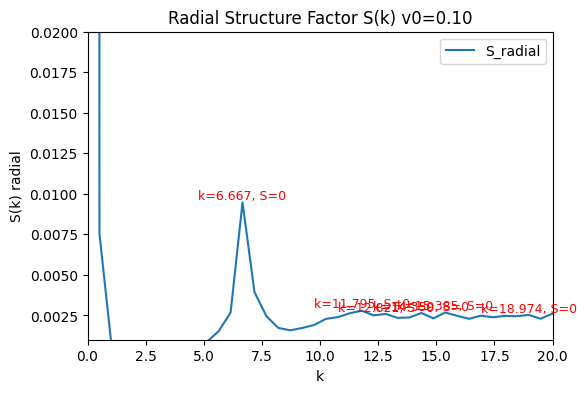

0.10 6.666666666666666


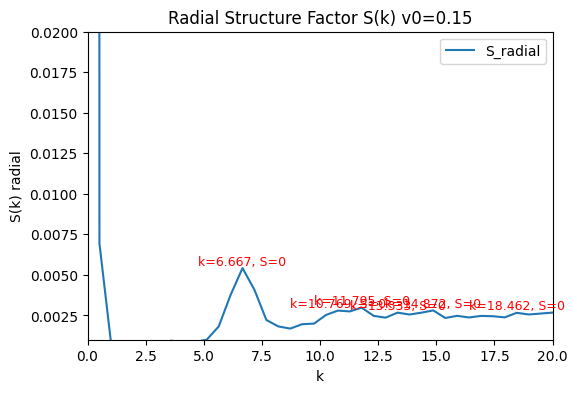

0.15 6.666666666666666


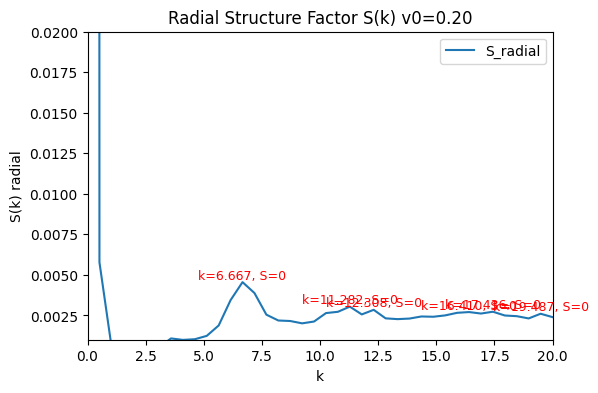

0.20 6.666666666666666


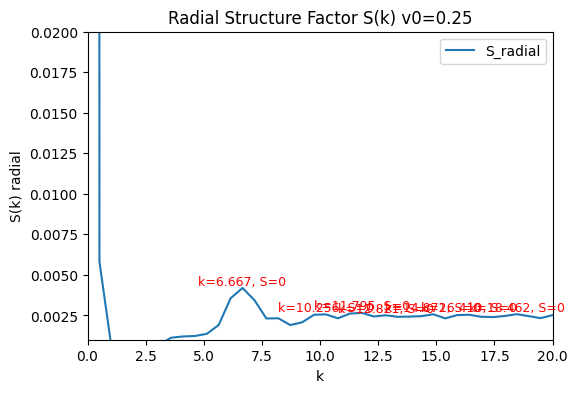

0.25 6.666666666666666


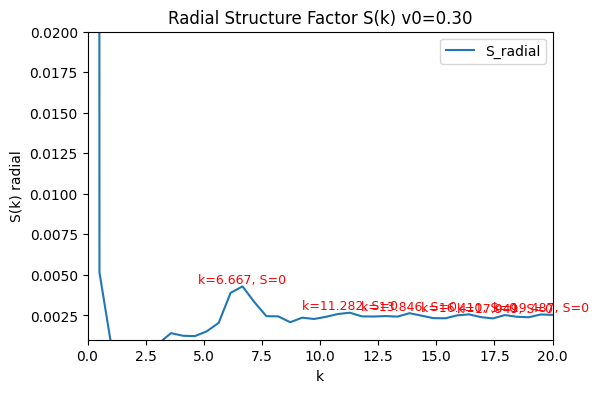

0.30 6.666666666666666


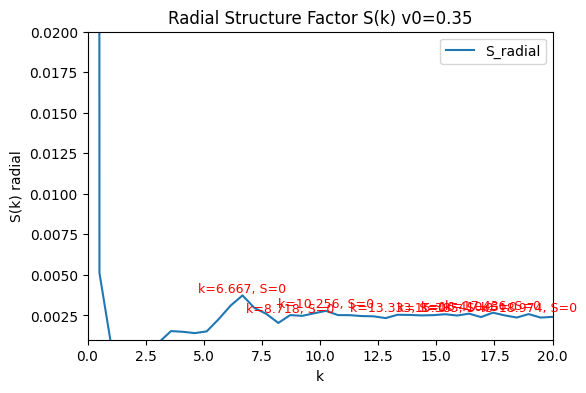

0.35 6.666666666666666


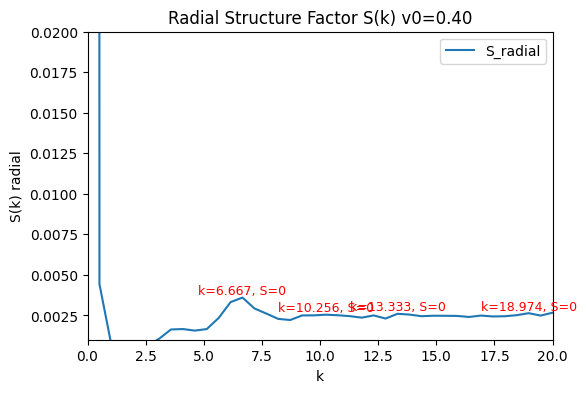

0.40 6.666666666666666


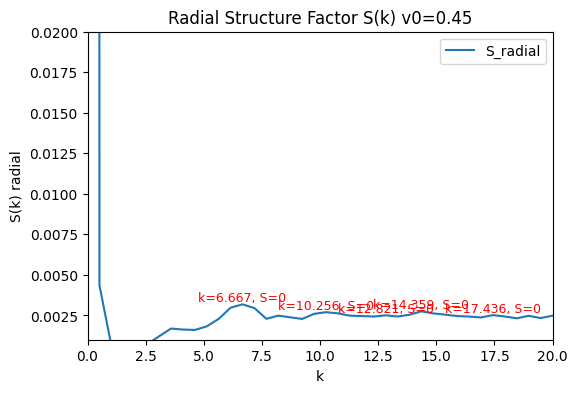

0.45 6.666666666666666


In [3]:
peak_positions = {}
for v0 in v0s:
    peaks = get_radial_peaks(S_2d_all[v0]/400, context[2], threshold = 0.0025, xlims = (0, 20), ylims = (0.001,0.02), y_log_scale=False, title = f"v0={v0}")
    peaks = np.array(peaks)
    peaks1 = peaks[peaks[:,0] > 4, :]
    peakmax = peaks1[np.argmax(peaks1[:,1]), 0]
    peak_positions[v0] = peakmax
    print(v0, peakmax)

In [4]:
peak_positions

{'0.10': np.float64(6.666666666666666),
 '0.15': np.float64(6.666666666666666),
 '0.20': np.float64(6.666666666666666),
 '0.25': np.float64(6.666666666666666),
 '0.30': np.float64(6.666666666666666),
 '0.35': np.float64(6.666666666666666),
 '0.40': np.float64(6.666666666666666),
 '0.45': np.float64(6.666666666666666)}

In [5]:
# import pickle
# # Save to a file
# with open(f'Sf_results_{N}.pkl', 'wb') as f:   # 'wb' = write binary
#     pickle.dump(results, f)


In [6]:
# with open('Sf_results_400.pkl', 'rb') as f:   # 'rb' = read binary
#     results_loaded = pickle.load(f)